In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# fetching data from computer 
import pandas as pd
data=pd.read_excel(r"C:\Users\malik\Downloads\car1.xlsx")
data.head()

Unnamed: 0                  Name   PRICE no of     fuel  driven    EMI  \
0         0.0   2021 Nissan MAGNITE  805000   1st   Petrol    3920  17907   
1         1.0    2020 Maruti Baleno  645199   1st   Petrol    2206  14352   
2         2.0     2020 Maruti IGNIS  486599   1st   Petrol    3459  10824   
3         3.0  2021 HYUNDAI NEW I20  875000   1st   Petrol    1878  19464   
4         4.0     2020 Maruti IGNIS  516999   1st   Petrol    8967  11500   

                        model transmision  year  Unnamed: 10  Unnamed: 11  \
0         XV MT PETROL Manual      Manual  2021          NaN          NaN   
1        DELTA 1.2 K12 Manual      Manual  2020          NaN          NaN   
2        SIGMA 1.2 K12 Manual      Manual  2020          NaN          NaN   
3  SPORTZ 1.0T GDI IMT Manual      Manual  2021          NaN          NaN   
4        SIGMA 1.2 K12 Manual      Manual  2020          NaN          NaN   

   Unnamed: 12  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [3]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
data.drop(['Unnamed: 10'],axis=1,inplace=True)

In [5]:
data.drop(['Unnamed: 11'],axis=1,inplace=True)

In [6]:
data.drop(['Unnamed: 12'],axis=1,inplace=True)

In [7]:
len(data)

5115

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5115 entries, 0 to 5114
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         5115 non-null   object
 1   PRICE        5115 non-null   int64 
 2   no of        5115 non-null   object
 3   fuel         5115 non-null   object
 4   driven       5115 non-null   int64 
 5   EMI          5115 non-null   int64 
 6   model        5115 non-null   object
 7   transmision  4916 non-null   object
 8   year         5115 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 359.8+ KB


In [9]:
data.head(5)

Name   PRICE no of     fuel  driven    EMI  \
0   2021 Nissan MAGNITE  805000   1st   Petrol    3920  17907   
1    2020 Maruti Baleno  645199   1st   Petrol    2206  14352   
2     2020 Maruti IGNIS  486599   1st   Petrol    3459  10824   
3  2021 HYUNDAI NEW I20  875000   1st   Petrol    1878  19464   
4     2020 Maruti IGNIS  516999   1st   Petrol    8967  11500   

                        model transmision  year  
0         XV MT PETROL Manual      Manual  2021  
1        DELTA 1.2 K12 Manual      Manual  2020  
2        SIGMA 1.2 K12 Manual      Manual  2020  
3  SPORTZ 1.0T GDI IMT Manual      Manual  2021  
4        SIGMA 1.2 K12 Manual      Manual  2020

In [10]:
# To fetch the details of rows
pd.set_option('display.max_rows',None)

In [11]:
# To fetch the detail of rows and coloumns
data.shape

(5115, 9)

In [12]:
data.columns

Index(['Name', 'PRICE', 'no of ', 'fuel', 'driven', 'EMI', 'model',
       'transmision', 'year'],
      dtype='object')

In [13]:
data.dtypes

Name           object
PRICE           int64
no of          object
fuel           object
driven          int64
EMI             int64
model          object
transmision    object
year            int64
dtype: object

In [14]:
data.isna().sum()

Name             0
PRICE            0
no of            0
fuel             0
driven           0
EMI              0
model            0
transmision    199
year             0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
cat=['Name','no of ','fuel','model','transmision']

for var in cat:
    le = preprocessing.LabelEncoder()
    data[var]=le.fit_transform(data[var].astype('str'))
data.dtypes

Name           int32
PRICE          int64
no of          int32
fuel           int32
driven         int64
EMI            int64
model          int32
transmision    int32
year           int64
dtype: object

array([[<AxesSubplot:title={'center':'Name'}>,
        <AxesSubplot:title={'center':'PRICE'}>,
        <AxesSubplot:title={'center':'no of '}>],
       [<AxesSubplot:title={'center':'fuel'}>,
        <AxesSubplot:title={'center':'driven'}>,
        <AxesSubplot:title={'center':'EMI'}>],
       [<AxesSubplot:title={'center':'model'}>,
        <AxesSubplot:title={'center':'transmision'}>,
        <AxesSubplot:title={'center':'year'}>]], dtype=object)

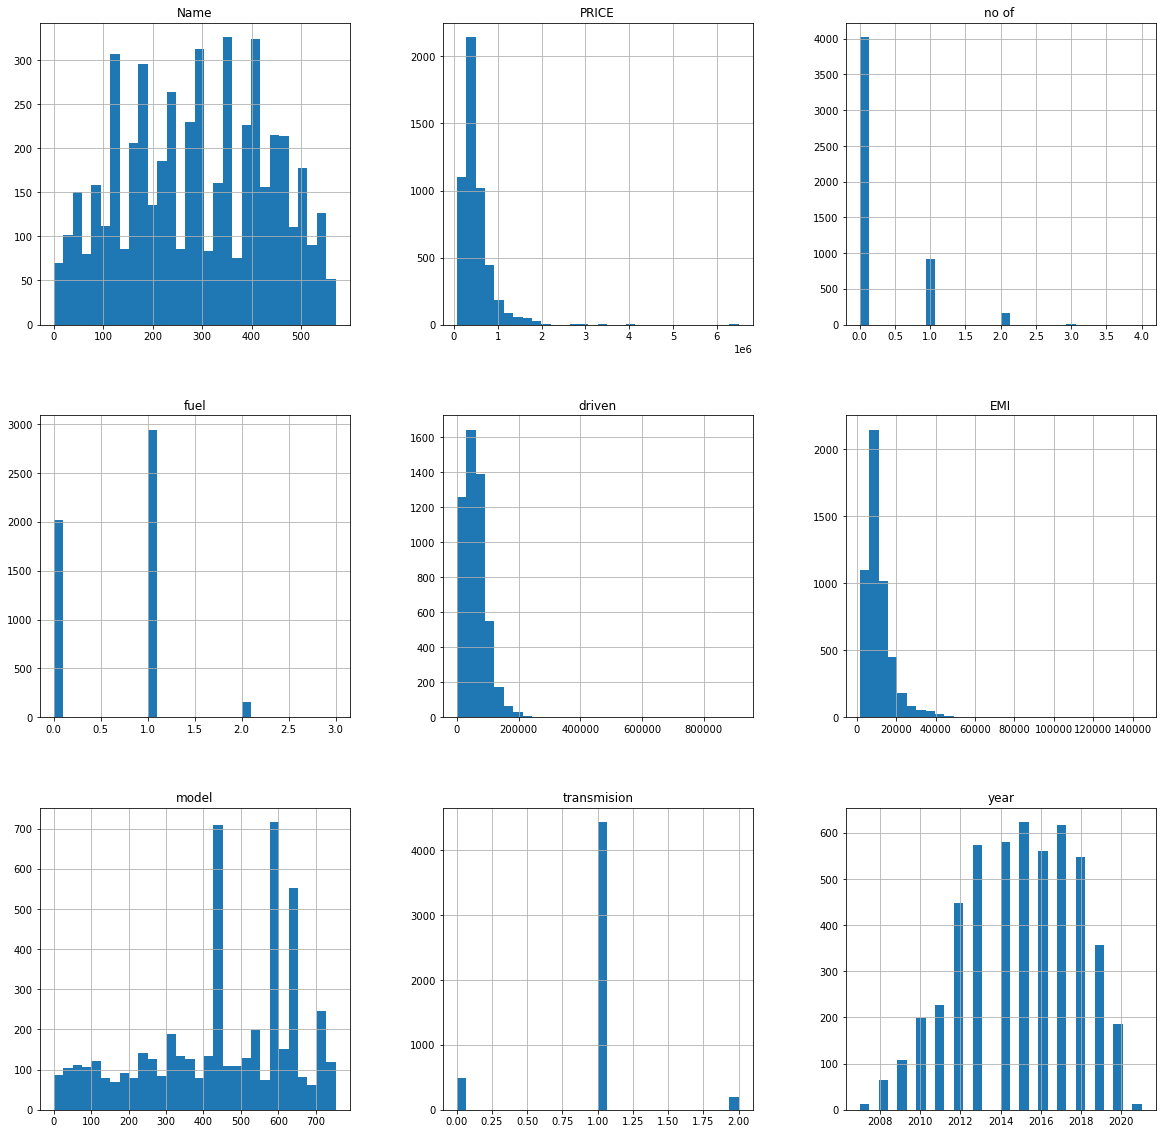

In [16]:
#histogram plot to analysie data
data.hist(figsize=(20,20),grid=True,layout=(3,3),bins=30)

In [17]:
data.isna().sum()

Name           0
PRICE          0
no of          0
fuel           0
driven         0
EMI            0
model          0
transmision    0
year           0
dtype: int64

In [18]:
data.head(5)

Name   PRICE  no of   fuel  driven    EMI  model  transmision  year
0   569  805000       0     1    3920  17907    692            1  2021
1   545  645199       0     1    2206  14352    308            1  2020
2   548  486599       0     1    3459  10824    509            1  2020
3   562  875000       0     1    1878  19464    522            1  2021
4   548  516999       0     1    8967  11500    509            1  2020

In [19]:
data.describe()

Name         PRICE       no of          fuel         driven  \
count  5115.000000  5.115000e+03  5115.000000  5115.000000    5115.000000   
mean    288.156598  4.966341e+05     0.250244     0.635386   58853.742131   
std     145.762774  3.359797e+05     0.517902     0.540317   40395.600470   
min       0.000000  6.600000e+04     0.000000     0.000000      23.000000   
25%     172.000000  2.965990e+05     0.000000     0.000000   30834.000000   
50%     291.000000  4.062990e+05     0.000000     1.000000   53843.000000   
75%     408.000000  5.966990e+05     0.000000     1.000000   80349.000000   
max     570.000000  6.500000e+06     4.000000     3.000000  912380.000000   

                 EMI        model  transmision         year  
count    5115.000000  5115.000000  5115.000000  5115.000000  
mean    11047.345846   444.444966     0.943695  2014.940762  
std      7473.680521   196.954542     0.361899     2.870053  
min      1468.000000     0.000000     0.000000  2007.000000  
25%      6598.000000   308.000000     1.000000  2013.000000  
50%      9038.000000   448.000000     1.000000  2015.000000  
75%     13273.000000   598.000000     1.000000  2017.000000  
max    144589.000000   753.000000     2.000000  2021.000000

In [20]:
data.isna().sum()

Name           0
PRICE          0
no of          0
fuel           0
driven         0
EMI            0
model          0
transmision    0
year           0
dtype: int64

Text(0.5, 1.0, 'price1 vs model')

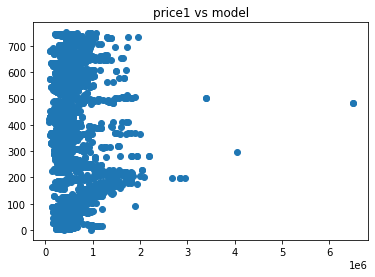

In [21]:
# features with respect to price checking what effect they have on it
plt.scatter(data.PRICE,data.model)
plt.title("price1 vs model")

Text(0.5, 1.0, 'price1 vs year')

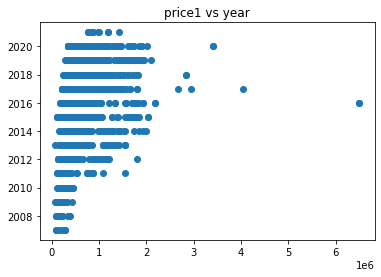

In [22]:
# features with respect to price checking what effect they have on it
plt.scatter(data.PRICE,data.year)
plt.title("price1 vs year")

In [23]:
# checking for skewed data 
data.skew()

Name          -0.037136
PRICE          4.317082
no of          2.123684
fuel           0.027331
driven         3.580620
EMI            4.317091
model         -0.555385
transmision   -0.717916
year          -0.264351
dtype: float64

In [24]:
#removing skewness
from sklearn.preprocessing import power_transform
data_new=power_transform(data)

data_new=pd.DataFrame(data_new,columns=data.columns)

In [25]:
data_new.skew()

Name          -0.221581
PRICE          0.000000
no of          1.401833
fuel          -0.110133
driven         0.039588
EMI           -0.006822
model         -0.423367
transmision    0.426604
year          -0.132342
dtype: float64

In [26]:
data["fuel"].value_counts()

1    2945
0    2018
2     151
3       1
Name: fuel, dtype: int64

In [27]:
data["year"].value_counts()

2015    623
2017    616
2014    579
2013    573
2016    560
2018    548
2012    449
2019    358
2011    228
2010    198
2020    185
2009    108
2008     64
2007     13
2021     13
Name: year, dtype: int64

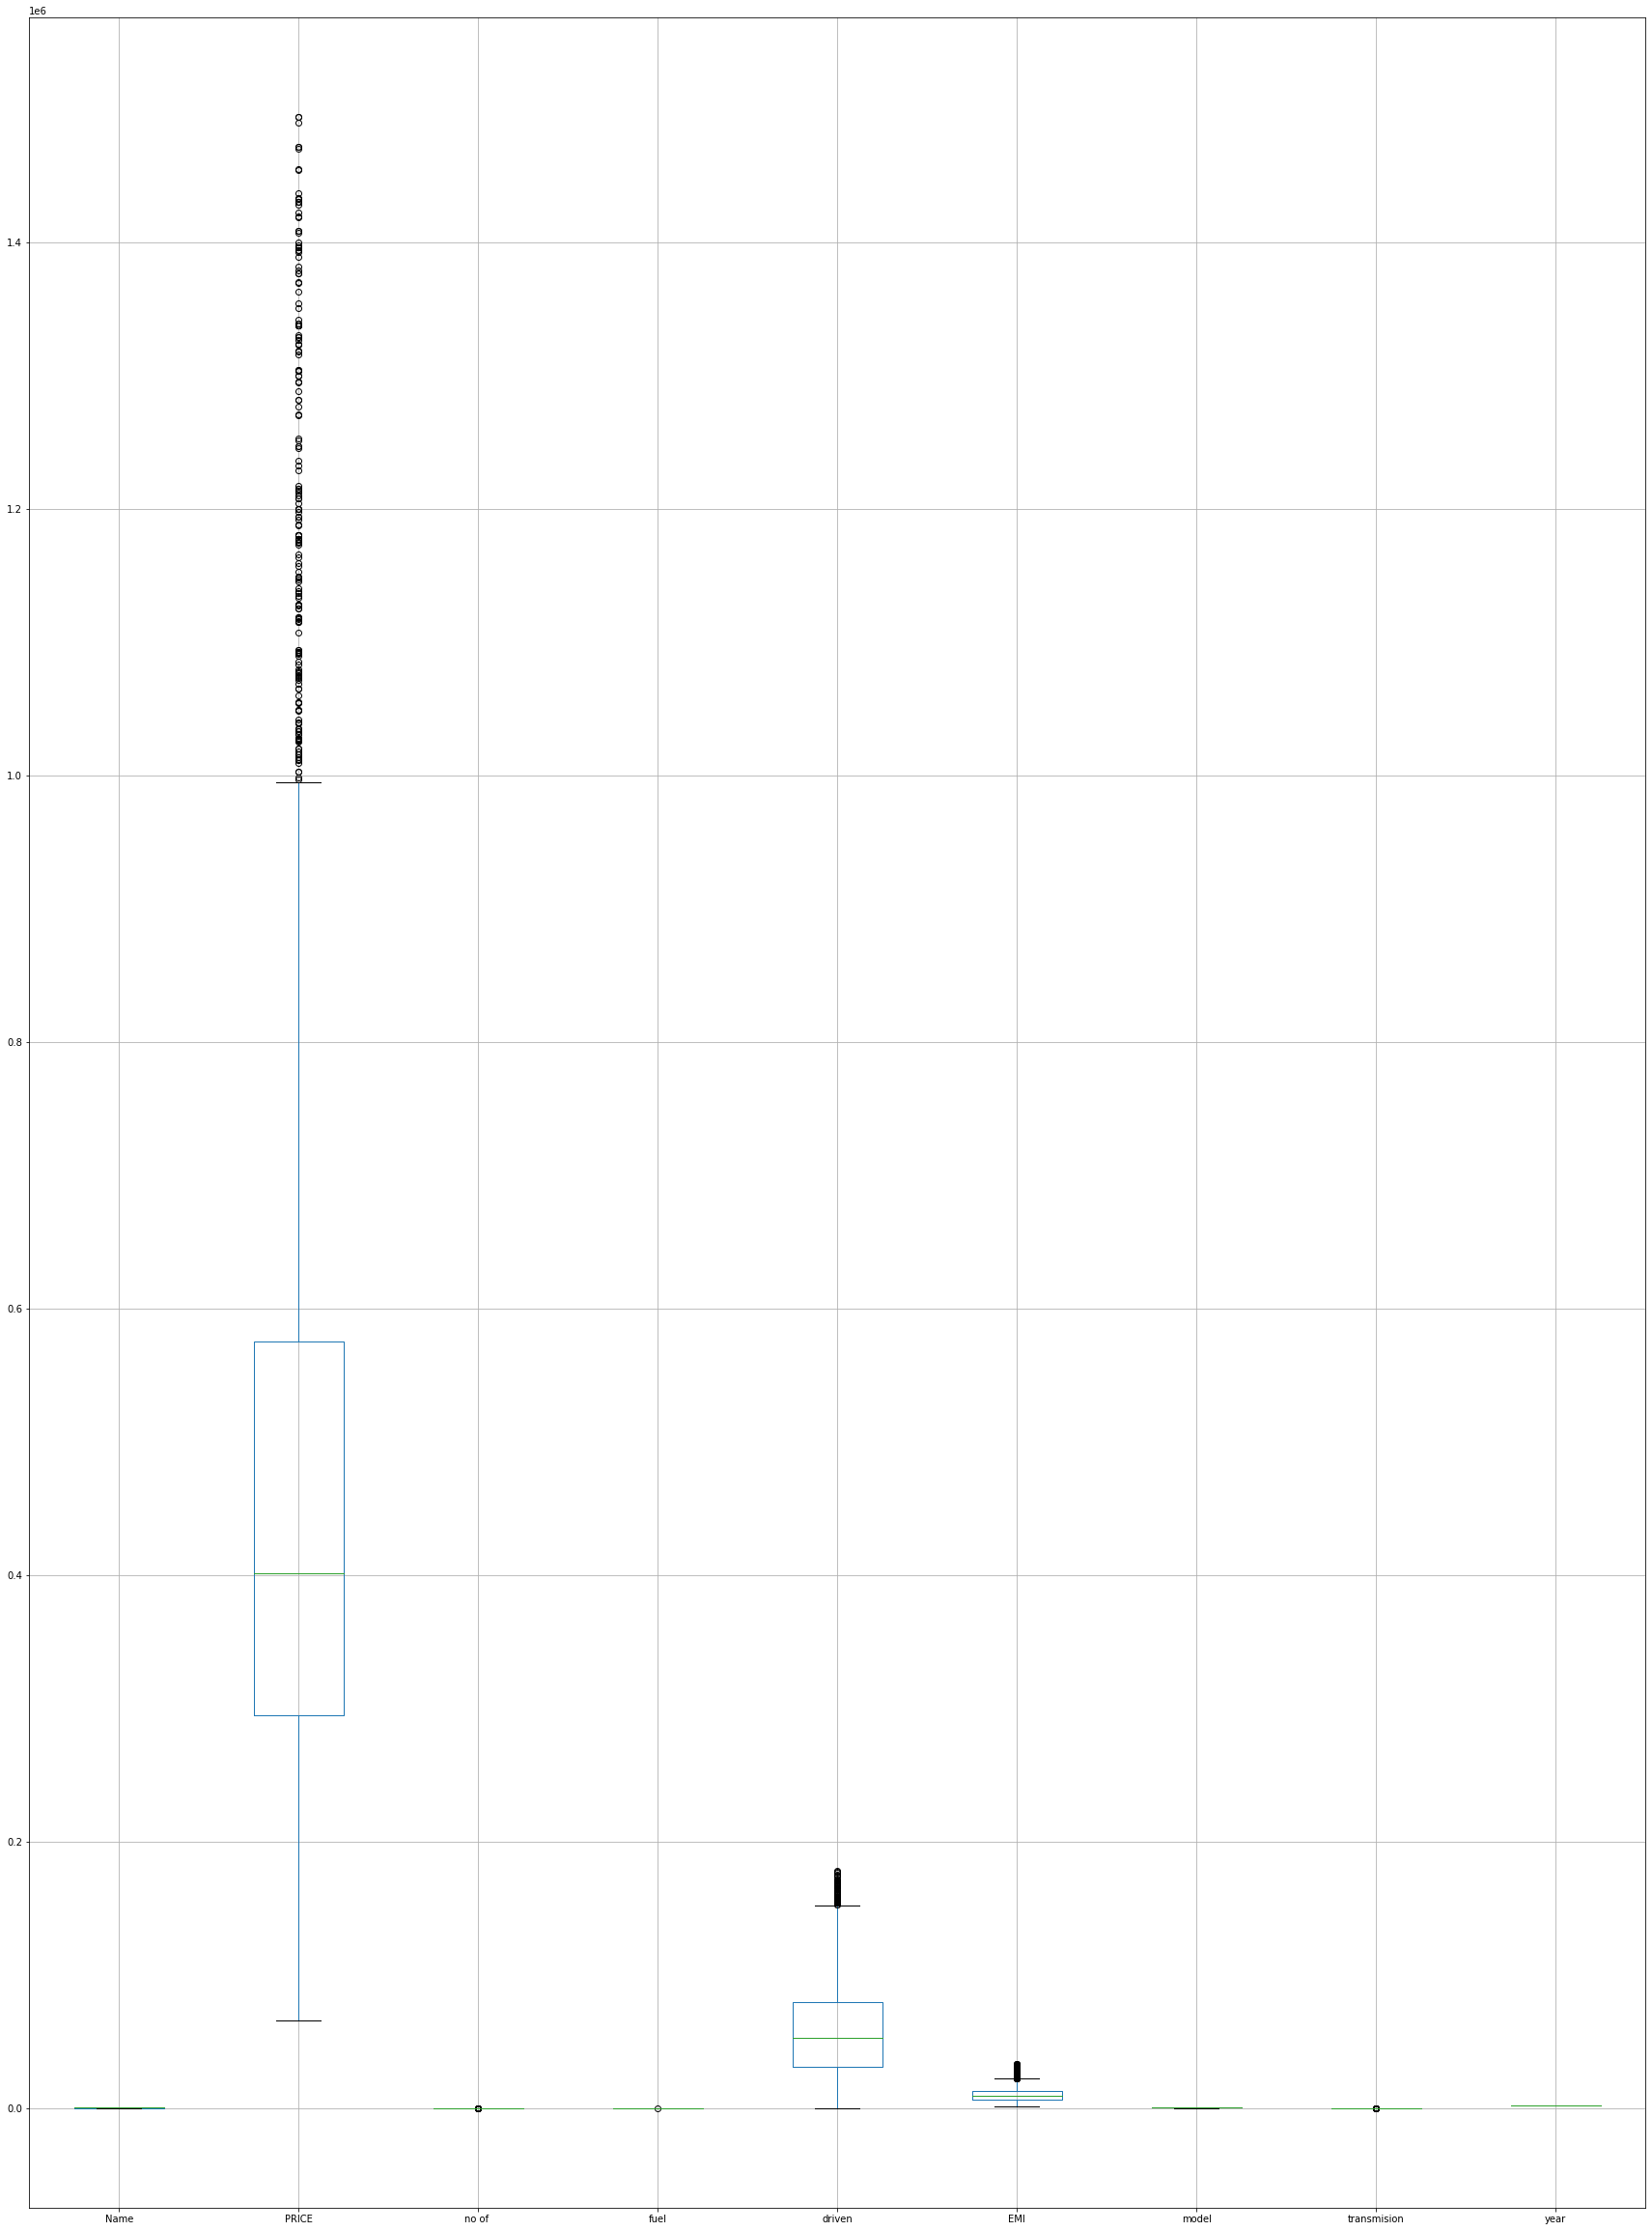

In [67]:
# plotting boxplot to identify outliers
data.boxplot(figsize=[30,50])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [68]:
#removing outliers
from scipy import stats
from scipy.stats import zscore

z_score = zscore(data[['PRICE','driven','EMI']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score <3).all(axis=1)

data=data[filtering_entry]
data.describe()

Name         PRICE       no of          fuel         driven  \
count  4844.000000  4.844000e+03  4844.000000  4844.000000    4844.000000   
mean    264.549959  4.498329e+05     0.246697     0.654624   55711.082164   
std     167.613917  2.167420e+05     0.514140     0.537503   32730.839169   
min       0.000000  6.600000e+04     0.000000     0.000000      23.000000   
25%     118.000000  2.924490e+05     0.000000     0.000000   30267.250000   
50%     249.000000  3.971990e+05     0.000000     1.000000   52128.000000   
75%     415.000000  5.614990e+05     0.000000     1.000000   78493.000000   
max     570.000000  1.200000e+06     4.000000     3.000000  158610.000000   

                EMI        model  transmision         year  
count   4844.000000  4844.000000  4844.000000  4844.000000  
mean   10006.277663   449.198803     0.958092  2014.879026  
std     4821.301426   195.893168     0.330965     2.872294  
min     1468.000000     0.000000     0.000000  2007.000000  
25%     6505.000000   311.000000     1.000000  2013.000000  
50%     8835.500000   465.000000     1.000000  2015.000000  
75%    12490.000000   599.000000     1.000000  2017.000000  
max    26693.000000   753.000000     2.000000  2021.000000

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

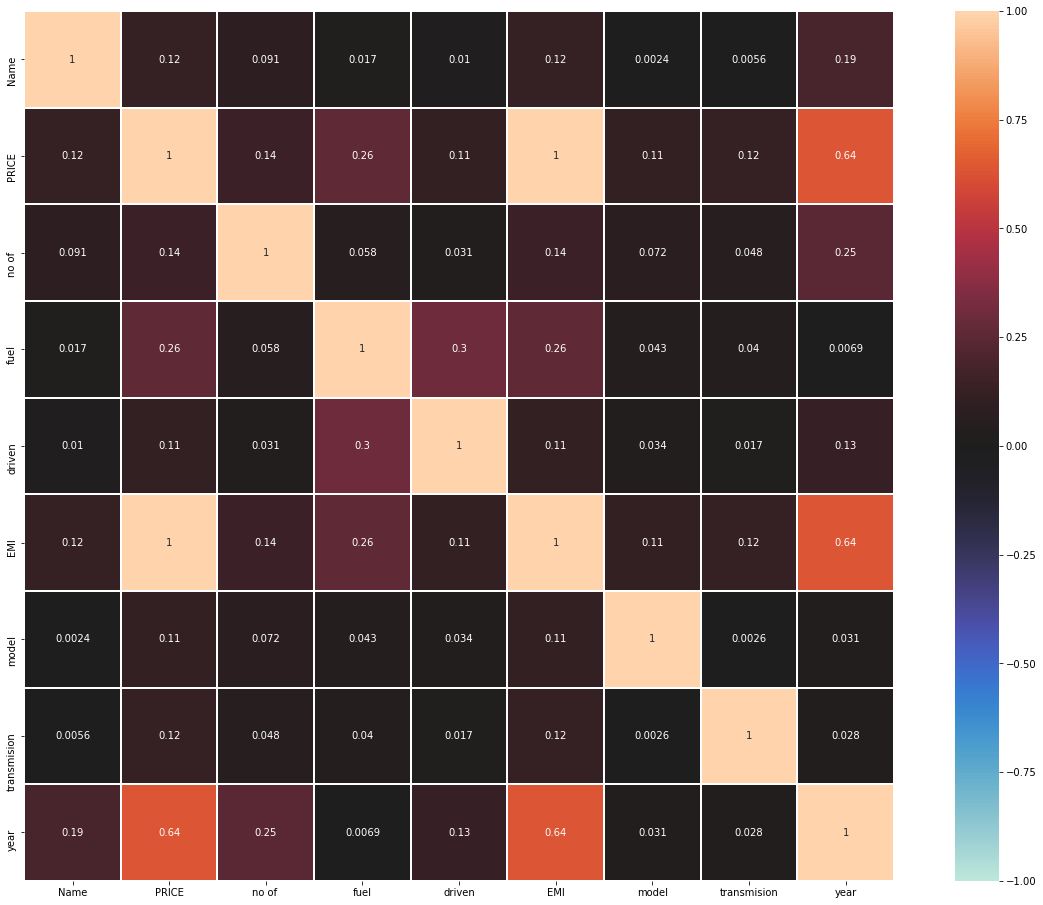

In [97]:
#heat map for corelation checking
df_corr =data.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,  vmin=-1,annot=True,
           square=True,center=0,fmt='.2g',linewidths=1,)
plt.tight_layout

In [69]:
#splitting data
y=data['PRICE']

x=data.drop(columns=['PRICE'])

In [70]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [71]:
#lr agoritm
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x,y)

LinearRegression()

In [72]:
lm.score(x_train,y_train)

0.9999999963687045

In [73]:
lm.score(x_test,y_test)

0.9999999963827905

In [74]:
#using dtc algoritm
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()
clf.fit(x_train,y_train)

DecisionTreeRegressor()

In [75]:
clf.score(x_train,y_train)

1.0

In [76]:
y_pred=clf.predict(x_test)

In [77]:
clf.score(x_test,y_test)

0.9999891244240342

In [125]:
#k nearest neighbour algorithm
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(
n_neighbors = 20, 
metric = 'minkowski', p = 2)
regressor.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=20)

In [126]:
y_pred  = regressor.predict(x_test)

In [127]:
regressor.score(x_test,y_test)

0.9796965584947634

In [101]:
#cross validation score
from sklearn.model_selection import cross_val_score
scr = cross_val_score(clf,x,y,cv=5)
print(scr.mean())

0.9999868679092474


In [102]:
#cross validation score
from sklearn.model_selection import cross_val_score
scr = cross_val_score(regressor,x,y,cv=5)
print(scr.mean())

-0.07963607255485292


In [103]:
#cross validation score
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lm,x,y,cv=5)
print(scr.mean())

0.9999999962089552


In [81]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)

SVR()

In [82]:
y_pred = regressor.predict(x_test)

In [83]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.053949077269287216

In [84]:
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV

In [112]:
lasscv=LassoCV(alphas = None,cv=10,max_iter =5000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=5000, normalize=True)

In [113]:
alpha=lasscv.alpha_
alpha

3.6091732698071093

In [114]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_test,y_test)

Lasso(alpha=3.6091732698071093)

In [115]:
lasso_reg.score(x_test,y_test)

0.9999999963849405

In [116]:
alphas = np.random.uniform(low=0, high=10,size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([2.02717633, 7.37588079, 7.13956678, 3.55925841, 2.73334706,
       5.87728355, 5.63488071, 3.53445599, 6.67055683, 9.92250843,
       2.74592767, 6.46232879, 7.4606532 , 6.92009806, 2.35732384,
       2.93343278, 2.73547578, 6.46993292, 5.08570698, 9.78715849,
       8.75442152, 6.45914418, 5.85336058, 9.14746513, 9.69759539,
       2.40113433, 8.55655502, 5.7239036 , 6.36603798, 1.19263113,
       0.41897225, 5.77753464, 7.66099796, 1.34814889, 6.12056629,
       5.8773982 , 2.47086987, 4.48475116, 6.02609385, 4.37015392,
       4.27840286, 8.52452957, 8.82804925, 4.97401694, 9.86879052,
       6.35530062, 9.89493738, 3.35460227, 5.59433448, 5.71541961]),
        cv=10, normalize=True)

In [117]:
ridgecv.alpha_

0.4189722451267075

In [118]:
ridge_model=RidgeCV(alphas =ridgecv.alphas)
ridge_model.fit(x_train, y_train)

RidgeCV(alphas=array([2.02717633, 7.37588079, 7.13956678, 3.55925841, 2.73334706,
       5.87728355, 5.63488071, 3.53445599, 6.67055683, 9.92250843,
       2.74592767, 6.46232879, 7.4606532 , 6.92009806, 2.35732384,
       2.93343278, 2.73547578, 6.46993292, 5.08570698, 9.78715849,
       8.75442152, 6.45914418, 5.85336058, 9.14746513, 9.69759539,
       2.40113433, 8.55655502, 5.7239036 , 6.36603798, 1.19263113,
       0.41897225, 5.77753464, 7.66099796, 1.34814889, 6.12056629,
       5.8773982 , 2.47086987, 4.48475116, 6.02609385, 4.37015392,
       4.27840286, 8.52452957, 8.82804925, 4.97401694, 9.86879052,
       6.35530062, 9.89493738, 3.35460227, 5.59433448, 5.71541961]))

In [119]:
ridge_model.score(x_test,y_test)

0.9999999959564998

In [120]:
#implementing lasso regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso = Lasso()

In [121]:
parameters = {"alpha":[116, 115, 333, 441, 112, 322, 416, 552, 614, 721]}
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(x_test, y_test)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [116, 115, 333, 441, 112, 322, 416, 552, 614,
                                   721]},
             scoring='neg_mean_squared_error')

In [122]:
print(lasso_regression.best_params_)

{'alpha': 116}


In [123]:
print(lasso_regression.best_score_)

-166.3309860232618


In [124]:
# saving the model
import pickle

from sklearn import model_selection
filename = 'car.sav'
pickle.dump(data, open(filename, 'wb'))